# 1. Import libraries

In [2]:
import os
import shutil
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import random
import cv2
import timm
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torchvision
from torch.nn import functional as F
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split

# 2. Extract Data from XML and Store in new folder

## Extract

In [6]:
def extract_data_from_xml(root_dir):
    xml_path = os.path.join(root_dir, 'words.xml')
    tree = ET.parse(xml_path)
    root = tree.getroot()

    img_paths = []
    img_sizes = []
    img_labels = []
    bboxes = []

    """
    root: thẻ tagset
    img: thẻ image
    bbs: thẻ taggedRectangles
    bb: thẻ taggedRectangle
    
    """
    for img in root:    
        bbs_of_img = []
        labels_of_img = []

        for bbs in img.findall('taggedRectangles'):
            for bb in bbs:
                if not bb[0].text.isalnum():
                    continue
                if 'é' in bb[0].text.lower() or 'ñ' in bb[0].text.lower():
                    continue

                bbs_of_img.append(
                    [
                        float(bb.attrib['x']),
                        float(bb.attrib['y']),
                        float(bb.attrib['width']),
                        float(bb.attrib['height'])
                    ]
                )

                labels_of_img.append(bb[0].text.lower())

        img_path = os.path.join(root_dir, img[0].text)
        img_paths.append(img_path)
        img_sizes.append(
            (
                int(img[1].attrib['x']),
                int(img[1].attrib['y'])
            )
        )
        img_labels.append(labels_of_img)
        bboxes.append(bbs_of_img)

    return img_paths, img_sizes, img_labels, bboxes

In [4]:
pwd

'C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)'

In [7]:
dataset_dir = "C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)\\icdar2003\\SceneTrialTrain"
img_paths, img_sizes, img_labels, bboxes = extract_data_from_xml(dataset_dir)

In [8]:
img_paths

['C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)\\icdar2003\\SceneTrialTrain\\apanar_06.08.2002/IMG_1261.JPG',
 'C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)\\icdar2003\\SceneTrialTrain\\apanar_06.08.2002/IMG_1263.JPG',
 'C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)\\icdar2003\\SceneTrialTrain\\apanar_06.08.2002/IMG_1265.JPG',
 'C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)\\icdar2003\\SceneTrialTrain\\apanar_06.08.2002/IMG_1269.JPG',
 'C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)\\icdar2003\\SceneTrialTrain\\apanar_06.08.2002/IMG_1281.JPG',
 'C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)\\icdar2003\\SceneTrialTrain\\apanar_06.08.2002/IMG_1282.JPG',
 'C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)\\icdar2003\\SceneTrialTrain\\apanar_06.08.2002/IMG_1283.JPG',
 'C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)\\icdar2003\\SceneTrialTrain\\apanar_06.08.2002/IMG_1284.JPG',
 'C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)\\icdar2003\\SceneTrialTrain\\apanar_06.08.2002/IMG_1285.JPG',
 'C:\\Users\\Admin\\AIO\\OCR_STR(Yolo

In [9]:
img_sizes

[(1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1598, 922),
 (1255, 981),
 (1124, 430),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (955, 500),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1019, 611),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (1600, 1200),
 (669, 520),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (1024, 768),
 (1024, 768),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (640, 480),
 (480, 640),
 (640, 480),
 (640, 480),
 (640, 480),
 (

In [11]:
img_labels

[['self',
  'adhesive',
  'address',
  'labels',
  '36',
  '89m',
  'cls',
  '250',
  'on',
  'a',
  'roll'],
 ['natwest'],
 ['greek',
  'gastronomy',
  'cookery',
  'wines',
  'local',
  'toubrs',
  'specialties',
  'festive',
  'recipes',
  'illustrated'],
 ['83',
  '73',
  'the',
  'house',
  'of',
  'the',
  'spirits',
  'isabel',
  'allende',
  'intensely',
  'moving',
  'both',
  'entertaining',
  'and',
  'deeply',
  'serious',
  'evening',
  'standard'],
 ['digital',
  'multimedia',
  'wiley',
  'nigel',
  'chapman',
  'and',
  'jenny',
  'chapman'],
 ['software', 'design', 'for', 'systems', 'j', 'e', 'cooling'],
 ['nokia',
  'adapter',
  'cable',
  'dlr',
  '3p',
  'a4382',
  'nokia',
  '6210',
  'dlr',
  '3p',
  'data',
  'cable'],
 ['professional',
  'issues',
  'in',
  'software',
  'engineering',
  'frank',
  'bott',
  'allison',
  'coleman',
  'jack',
  'eaton',
  'diane',
  'rowland',
  'third',
  'edition'],
 ['silberschatz',
  'galvin',
  'operating',
  'system',
  'co

In [12]:
 bboxes

[[[174.0, 392.0, 274.0, 195.0],
  [512.0, 391.0, 679.0, 183.0],
  [184.0, 612.0, 622.0, 174.0],
  [863.0, 599.0, 446.0, 187.0],
  [72.0, 6.0, 95.0, 87.0],
  [247.0, 2.0, 197.0, 88.0],
  [792.0, 0.0, 115.0, 81.0],
  [200.0, 848.0, 228.0, 139.0],
  [473.0, 878.0, 165.0, 109.0],
  [684.0, 878.0, 71.0, 106.0],
  [806.0, 844.0, 218.0, 141.0]],
 [[432.0, 635.0, 847.0, 172.0]],
 [[656.0, 222.0, 502.0, 81.0],
  [626.0, 253.0, 540.0, 31.0],
  [709.0, 307.0, 409.0, 69.0],
  [791.0, 368.0, 265.0, 73.0],
  [1152.0, 953.0, 57.0, 19.0],
  [653.0, 1006.0, 63.0, 15.0],
  [1101.0, 974.0, 111.0, 14.0],
  [1065.0, 1000.0, 70.0, 16.0],
  [1138.0, 1000.0, 74.0, 15.0],
  [1067.0, 1025.0, 145.0, 18.0]],
 [[682.0, 754.0, 64.0, 43.0],
  [796.0, 759.0, 61.0, 40.0],
  [573.0, 541.0, 138.0, 52.0],
  [743.0, 532.0, 350.0, 61.0],
  [1141.0, 528.0, 64.0, 75.0],
  [642.0, 635.0, 103.0, 52.0],
  [788.0, 625.0, 363.0, 59.0],
  [730.0, 243.0, 374.0, 77.0],
  [577.0, 334.0, 644.0, 102.0],
  [611.0, 458.0, 99.0, 26.0],
  

In [14]:
print(f"Total image: {len(img_paths)}")
print(f"Total bounding boxes: {sum([len(bbs) for bbs in bboxes])}")

Total image: 250
Total bounding boxes: 1097


## Plot an example

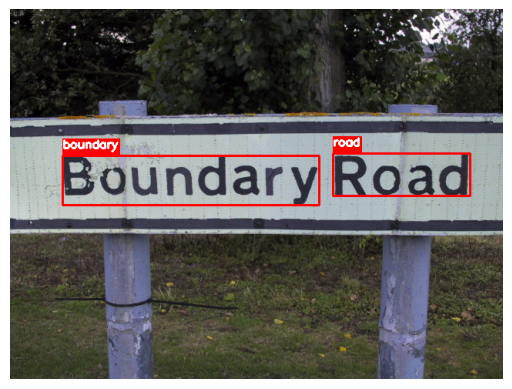

In [25]:
def plot_image_with_bbs(img_path, bbs, labels):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for idx, bb in enumerate(bbs):
        start_point = (int(bb[0]), int(bb[1]))
        end_point = (int(bb[0] + bb[2]), int(bb[1] + bb[3]))
        color = (255, 0, 0)
        thickness = 2
        img = cv2.rectangle(img, start_point, end_point, color, thickness)

        # Vẽ labels lên cạnh của bbox
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_color = (255, 255, 255)
        line_type = 2
        text_thickness = 2
        label = labels[idx]
        text_size, _ = cv2.getTextSize(label, font, font_scale, text_thickness)

        label_backgr_start = (int(bb[0]), int(bb[1] - text_size[1] - 10))
        label_backgr_end = (int(bb[0] + text_size[0]), int(bb[1]))
        img = cv2.rectangle(img, label_backgr_start, label_backgr_end, color, cv2.FILLED)

        cv2.putText(
            img,
            label,
            (int(bb[0]), int(bb[1] - 10)),
            font,
            font_scale,
            font_color,
            text_thickness,
            line_type
        )

    plt.imshow(img)
    plt.axis('off')
    plt.show()

i = random.randint(0, len(img_paths))
plot_image_with_bbs(img_paths[i], bboxes[i], img_labels[i])

## Store all bounding boxes as a new dataset

In [26]:
def split_bounding_boxes(img_paths, img_labels, bboxes, save_dir):
    os.makedirs(save_dir, exist_ok = True)

    count = 0
    labels = []

    for img_path, img_label, bbs in zip(img_paths, img_labels, bboxes):
        img = Image.open(img_path)

        for label, bb in zip(img_label, bbs):
            cropped_img = img.crop((bb[0], bb[1], bb[0]+bb[2], bb[1]+bb[3]))

            if np.mean(cropped_img) < 35 or np.mean(cropped_img) > 220:
                continue
            if cropped_img.size[0] < 10 or cropped_img.size[1] < 10:
                continue
            if len(label) < 3:
                continue

            filename = f"{count:06d}.jpg"
            cropped_img.save(os.path.join(save_dir, filename))
            new_img_path = os.path.join(save_dir, filename)

            label = new_img_path + '\t' + label
            labels.append(label)

            count += 1

    print(f"Created {count} images")

    with open(os.path.join(save_dir, 'labels.txt'), 'w') as f:
        for label in labels:
            f.write(f'{label}\n')

In [27]:
pwd

'C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)'

In [28]:
save_dir = "C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)\\icdar2003\\ocr_dataset"
split_bounding_boxes(img_paths, img_labels, bboxes, save_dir)

Created 928 images


# 3. Read Dataset

In [29]:
root_dir = save_dir

img_paths = []
labels = []

with open(os.path.join(root_dir, 'labels.txt'), 'r') as f:
    for label in f:
        labels.append(label.strip().split('\t')[1])
        img_paths.append(label.strip().split('\t')[0])

print(f'TOTAL IMAGES: {len(img_paths)}')

TOTAL IMAGES: 928


# 4. Prepare vocabulary

In [41]:
letters = [char.split('.')[0].lower() for char in labels]
letters = "".join(letters)

letters = sorted(list(set(list(letters))))
chars = "".join(letters)

# Thêm ký tự "blank" vào bộ vocab
blank_char = '-'
chars += blank_char

vocab_size = len(chars)

print(f"Vocab: {chars}")
print(f"Vocab size: {vocab_size}")

Vocab: 0123456789abcdefghijklmnopqrstuvwxyz-
Vocab size: 37


In [43]:
# Tạo dictionary chuyển đổi ký tự (class) sang dạng số và ngược lại
char_to_idx = {char: idx + 1 for idx, char in enumerate(sorted(chars))}
idx_to_char = {idx: char for char, idx in char_to_idx.items()}

In [44]:
char_to_idx

{'-': 1,
 '0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 'a': 12,
 'b': 13,
 'c': 14,
 'd': 15,
 'e': 16,
 'f': 17,
 'g': 18,
 'h': 19,
 'i': 20,
 'j': 21,
 'k': 22,
 'l': 23,
 'm': 24,
 'n': 25,
 'o': 26,
 'p': 27,
 'q': 28,
 'r': 29,
 's': 30,
 't': 31,
 'u': 32,
 'v': 33,
 'w': 34,
 'x': 35,
 'y': 36,
 'z': 37}

In [45]:
idx_to_char

{1: '-',
 2: '0',
 3: '1',
 4: '2',
 5: '3',
 6: '4',
 7: '5',
 8: '6',
 9: '7',
 10: '8',
 11: '9',
 12: 'a',
 13: 'b',
 14: 'c',
 15: 'd',
 16: 'e',
 17: 'f',
 18: 'g',
 19: 'h',
 20: 'i',
 21: 'j',
 22: 'k',
 23: 'l',
 24: 'm',
 25: 'n',
 26: 'o',
 27: 'p',
 28: 'q',
 29: 'r',
 30: 's',
 31: 't',
 32: 'u',
 33: 'v',
 34: 'w',
 35: 'x',
 36: 'y',
 37: 'z'}

In [46]:
# Tìm label có độ dài lớn nhất để thêm padding
max_label_len = max([len(label) for label in labels])
max_label_len

14

## Encode and Decode function

In [48]:
def encode(label, char_to_idx = char_to_idx, max_label_len = max_label_len):
    encoded_labels = torch.tensor(
        [char_to_idx[char] for char in label],
        dtype = torch.long
    )

    label_len = len(encoded_labels)
    lengths = torch.tensor(
        label_len,
        dtype = torch.long
    )

    # Padding
    padded_labels = F.pad(
        encoded_labels,
        (0, max_label_len - label_len),
        value = 0
    )

    return padded_labels, lengths

In [86]:
print(labels[0])
encode(labels[0])

self


(tensor([30, 16, 23, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]), tensor(4))

In [99]:
def decode(encoded_seqs, idx_to_char = idx_to_char, blank_char = '-'):
    # Parameter: encoded_seqs (list): Danh sách các tensor label
    decoded_seqs = []

    for seq in encoded_seqs:
        decoded_label = []
        for idx, token in enumerate(seq):
            if token != 0:
                char = idx_to_char[token.item()]
                if char != blank_char:
                    decoded_label.append(char)

        decoded_seqs.append(''.join(decoded_label))

    return decoded_seqs

In [100]:
decode([encode(labels[0])[0]])

['self']

# 5. Create data preprocessing function

In [106]:
data_transforms = {
    'train': transforms.Compose(
        [
            transforms.Resize((100, 420)),
            transforms.ColorJitter(
                brightness=0.5,
                contrast=0.5,
                saturation=0.5
            ),
            transforms.Grayscale(num_output_channels=1),
            transforms.GaussianBlur(3),
            transforms.RandomAffine(degrees=2, shear=2),
            transforms.RandomPerspective(
                distortion_scale=0.4,
                p=0.5,
                interpolation=3
            ),
            transforms.RandomRotation(degrees=2),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ]
    ),
    'val': transforms.Compose(
        [
            transforms.Resize((100, 420)),
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ]
    )
}

# 6. Train, val, test

In [103]:
seed = 0
val_size = 0.2
test_size = 0.125

X_train, X_val, y_train, y_val = train_test_split(
    img_paths, labels,
    test_size = val_size,
    random_state = seed,
    shuffle = True
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = seed,
    shuffle = True
)

# 7. Create pytorch dataset

In [104]:
class STRDataset(Dataset):
    def __init__(
        self, X, y,
        char_to_idx, max_label_len,
        label_encoder=None, transform=None
    ):
        self.transform = transform
        self.img_paths = X
        self.labels = y
        self.char_to_idx = char_to_idx
        self.max_label_len = max_label_len
        self.label_encoder = label_encoder

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        img_path = self.img_paths[idx]
        img = Image.open(img_path).convert('RGB')

        if self.transform:
            img = self.transform(img)

        if self.label_encoder:
            encoded_label, label_len = self.label_encoder(
                label,
                self.char_to_idx,
                self.max_label_len
            )

        return img, encoded_label, label_len

# 8. Create dataloader

In [107]:
train_dataset = STRDataset(
    X_train, y_train,
    char_to_idx, max_label_len,
    label_encoder = encode,
    transform = data_transforms['train']
)

val_dataset = STRDataset(
    X_val, y_val,
    char_to_idx, max_label_len,
    label_encoder = encode,
    transform = data_transforms['val']
)

test_dataset = STRDataset(
    X_test, y_test,
    char_to_idx, max_label_len,
    label_encoder = encode,
    transform = data_transforms['val']
)

In [112]:
print(f"Train dataset: {len(train_dataset)}")
print(f"Val dataset: {len(val_dataset)}")
print(f"Test dataset: {len(test_dataset)}")

Train dataset: 649
Val dataset: 186
Test dataset: 93


In [115]:
train_batch_size = 32
test_batch_size = 8

train_loader = DataLoader(
    train_dataset,
    batch_size = train_batch_size,
    shuffle = True
)

val_loader = DataLoader(
    val_dataset,
    batch_size = test_batch_size,
    shuffle = False
)

test_loader = DataLoader(
    test_dataset,
    batch_size = test_batch_size,
    shuffle = False
)

In [131]:
# Lấy ra batch đầu tiên (next)
train_features, train_labels, train_lengths = next(iter(train_loader))

# display images
def show_batch(imgs, labels):
    labels = decode(labels)
    grid = torchvision.utils.make_grid(imgs, nrow=4, normalize=True)
    plt.figure(figsize=(10, 20))
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.axis('off')
    print(labels)
    plt.show()

['technical', 'price', 'bison', 'tesco', 'design', 'pure', 'sorry', 'digital', 'wsdl', 'argos', 'concepts', 'help', 'permit', 'licence', 'stationery', 'a134', 'services', 'labels', '2nd', 'computing', 'case', 'caution', 'phones', 'and', 'and', 'town', 'farnborough', 'the', 'tickets', 'for', 'site', 'allende']


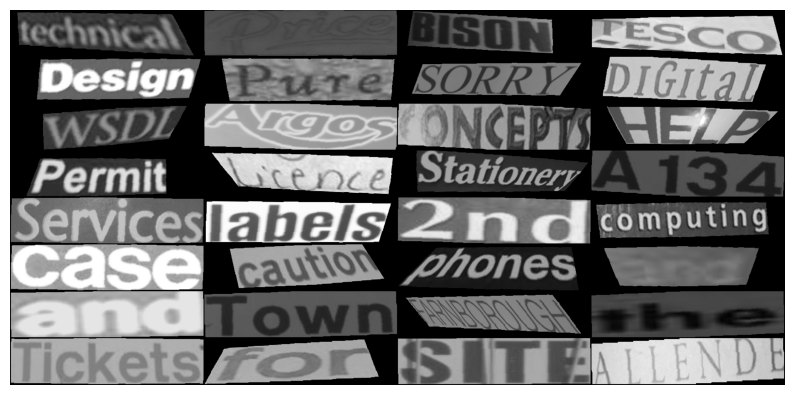

In [132]:
show_batch(train_features, train_labels)

# 9. Create model

In [152]:
class CRNN(nn.Module):
    def __init__(
        self,
        vocab_size,
        hidden_size,
        n_layers,
        dropout=0.2,
        unfreeze_layers=3
    ):
        super(CRNN, self).__init__()

        # Khởi tạo pretrained model resnet101
        backbone = timm.create_model(
            'resnet101',
            in_chans=1,
            pretrained=True
        )

        # Bỏ đi lớp classifier gốc của pretrained
        modules = list(backbone.children())[:-2]
        modules.append(nn.AdaptiveAvgPool2d((1, None)))
        self.backbone = nn.Sequential(*modules)

        # unfreeze
        for parameter in self.backbone[-unfreeze_layers:].parameters():
            parameter.requires_grad = True

        # layer map từ CNN features maps sang LSTM
        self.mapSeq = nn.Sequential(
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        self.lstm = nn.LSTM(
            1024, hidden_size,
            n_layers, bidirectional=True, batch_first=True,
            dropout=dropout if n_layers > 1 else 0
        )

        self.layer_norm = nn.LayerNorm(hidden_size * 2)
        self.out = nn.Sequential(
            nn.Linear(hidden_size * 2, vocab_size),
            nn.LogSoftmax(dim=2)
        )

    def forward(self, x):
        x = self.backbone(x)  # Shape: (bs, c, h, w)
        x = x.permute(0, 3, 1, 2)  # Shape: (bs, w, c, h)
        x = x.view(x.size(0), x.size(1), -1)  # Shape: (bs, w, c)
        x = self.mapSeq(x)
        x, _ = self.lstm(x)
        x = self.layer_norm(x)
        x = self.out(x)  # Shape: (bs, seq_len, n_classes)
        x = x.permute(1, 0, 2)  # Based on CTC

        return x

In [153]:
hidden_size = 256
n_layers = 2
dropout_prob = 0.3
unfreeze_layers = 3
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = CRNN(
    vocab_size,
    hidden_size,
    n_layers = n_layers,
    dropout = dropout_prob,
    unfreeze_layers = unfreeze_layers,
).to(device)

In [154]:
model.eval()

dummy_tensor = torch.rand((64, 1, 100, 420)).to(device)

with torch.no_grad():
    output = model(dummy_tensor)

print('Output shape: ', output.shape)

Output shape:  torch.Size([14, 64, 37])


# 10. Training

In [162]:
def evaluate(model, dataloader, criterion, device):
    model.eval()
    losses = []
    with torch.no_grad():
        for inputs, labels, labels_len in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            labels_len = labels_len.to(device)

            outputs = model(inputs)

            logits_lens = torch.full(
                size = (outputs.size(1),),
                fill_value = outputs.size(0),
                dtype = torch.long
            ).to(device)

            loss = criterion(
                outputs, labels, logits_lens, labels_len
            )
            losses.append(loss.item())

    loss = sum(losses) / len(losses)

    return loss

In [163]:
def fit(
    model, train_loader,
    val_loader, criterion,
    optimizer, scheduler,
    device, epochs
):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        batch_train_losses = []

        model.train()
        for idx, (inputs, labels, labels_len) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            labels_len = labels_len.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)

            logits_lens = torch.full(
                size = (outputs.size(1),),
                fill_value = outputs.size(0),
                dtype = torch.long
            ).to(device)

            loss = criterion(
                outputs, labels, logits_lens, labels_len
            )
            loss.backward()

            torch.nn.utils.clip_grad_norm(
                model.parameters(),
                5
            )
            optimizer.step()

            batch_train_losses.append(loss.item())

        train_loss = sum(batch_train_losses) / len(batch_train_losses)
        train_losses.append(train_loss)

        val_loss = evaluate(
            model, val_loader,
            criterion, device
        )
        val_losses.append(val_loss)
        print(f'Epoch {epoch + 1}:\tTrain loss: {train_loss:.4f}\tVal loss: {val_loss:.4f}')

        scheduler.step()

    return train_losses, val_losses

In [164]:
epochs = 100
lr = 0.001
weight_decay = 1e-5
scheduler_step_size = epoch * 0.5

criterion = nn.CTCLoss(
    blank=char_to_idx[blank_char],
    zero_infinity=True
)
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=lr,
    weight_decay=weight_decay
)
scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=scheduler_step_size,
    gamma=0.1
)

In [165]:
train_losses, val_losses = fit(
    model, train_loader,
    val_loader, criterion,
    optimizer, scheduler,
    device, epochs
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9096\1368085035.py:33: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(


Epoch 1:	Train loss: 3.4011	Val loss: 3.3097
Epoch 2:	Train loss: 3.2637	Val loss: 3.2683
Epoch 3:	Train loss: 3.2342	Val loss: 3.1622
Epoch 4:	Train loss: 2.9469	Val loss: 2.7865
Epoch 5:	Train loss: 2.4400	Val loss: 2.0990
Epoch 6:	Train loss: 1.8287	Val loss: 1.7777
Epoch 7:	Train loss: 1.4212	Val loss: 1.4698
Epoch 8:	Train loss: 1.0404	Val loss: 1.1461
Epoch 9:	Train loss: 0.8813	Val loss: 0.8889
Epoch 10:	Train loss: 0.7102	Val loss: 0.9574
Epoch 11:	Train loss: 0.6286	Val loss: 0.7439
Epoch 12:	Train loss: 0.5195	Val loss: 0.8083
Epoch 13:	Train loss: 0.4447	Val loss: 0.7605
Epoch 14:	Train loss: 0.4383	Val loss: 0.7033
Epoch 15:	Train loss: 0.4107	Val loss: 0.7036
Epoch 16:	Train loss: 0.3389	Val loss: 0.7749
Epoch 17:	Train loss: 0.3601	Val loss: 0.6941
Epoch 18:	Train loss: 0.3470	Val loss: 0.7246
Epoch 19:	Train loss: 0.2814	Val loss: 0.7012
Epoch 20:	Train loss: 0.3025	Val loss: 0.6578
Epoch 21:	Train loss: 0.3017	Val loss: 0.7017
Epoch 22:	Train loss: 0.2943	Val loss: 0.71

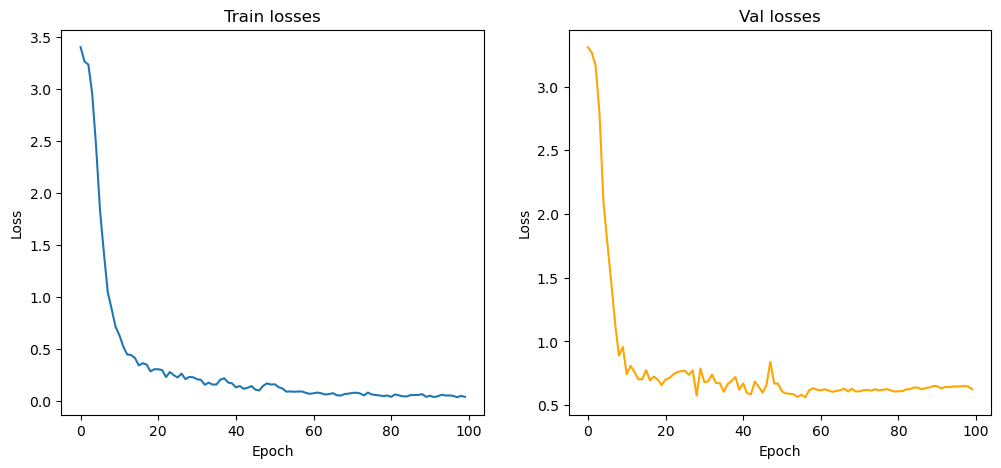

In [167]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(train_losses)
ax[0].set_title('Train losses')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[1].plot(val_losses, color='orange')
ax[1].set_title('Val losses')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
plt.show()

# 11. Evaluation

In [168]:
val_loss = evaluate(
    model,
    val_loader,
    criterion,
    device
)

test_loss = evaluate(
    model,
    test_loader,
    criterion,
    device
)

print('Evaluation on val/test dataset')
print('Val loss: ', val_loss)
print('Test loss: ', test_loss)

Evaluation on val/test dataset
Val loss:  0.6243500271812081
Test loss:  0.5058708796083616


# 12. Make Predictions

In [169]:
def predict(model, img):
    model.eval()
    with torch.no_grad():
        outputs = model(img)
        print(outputs)

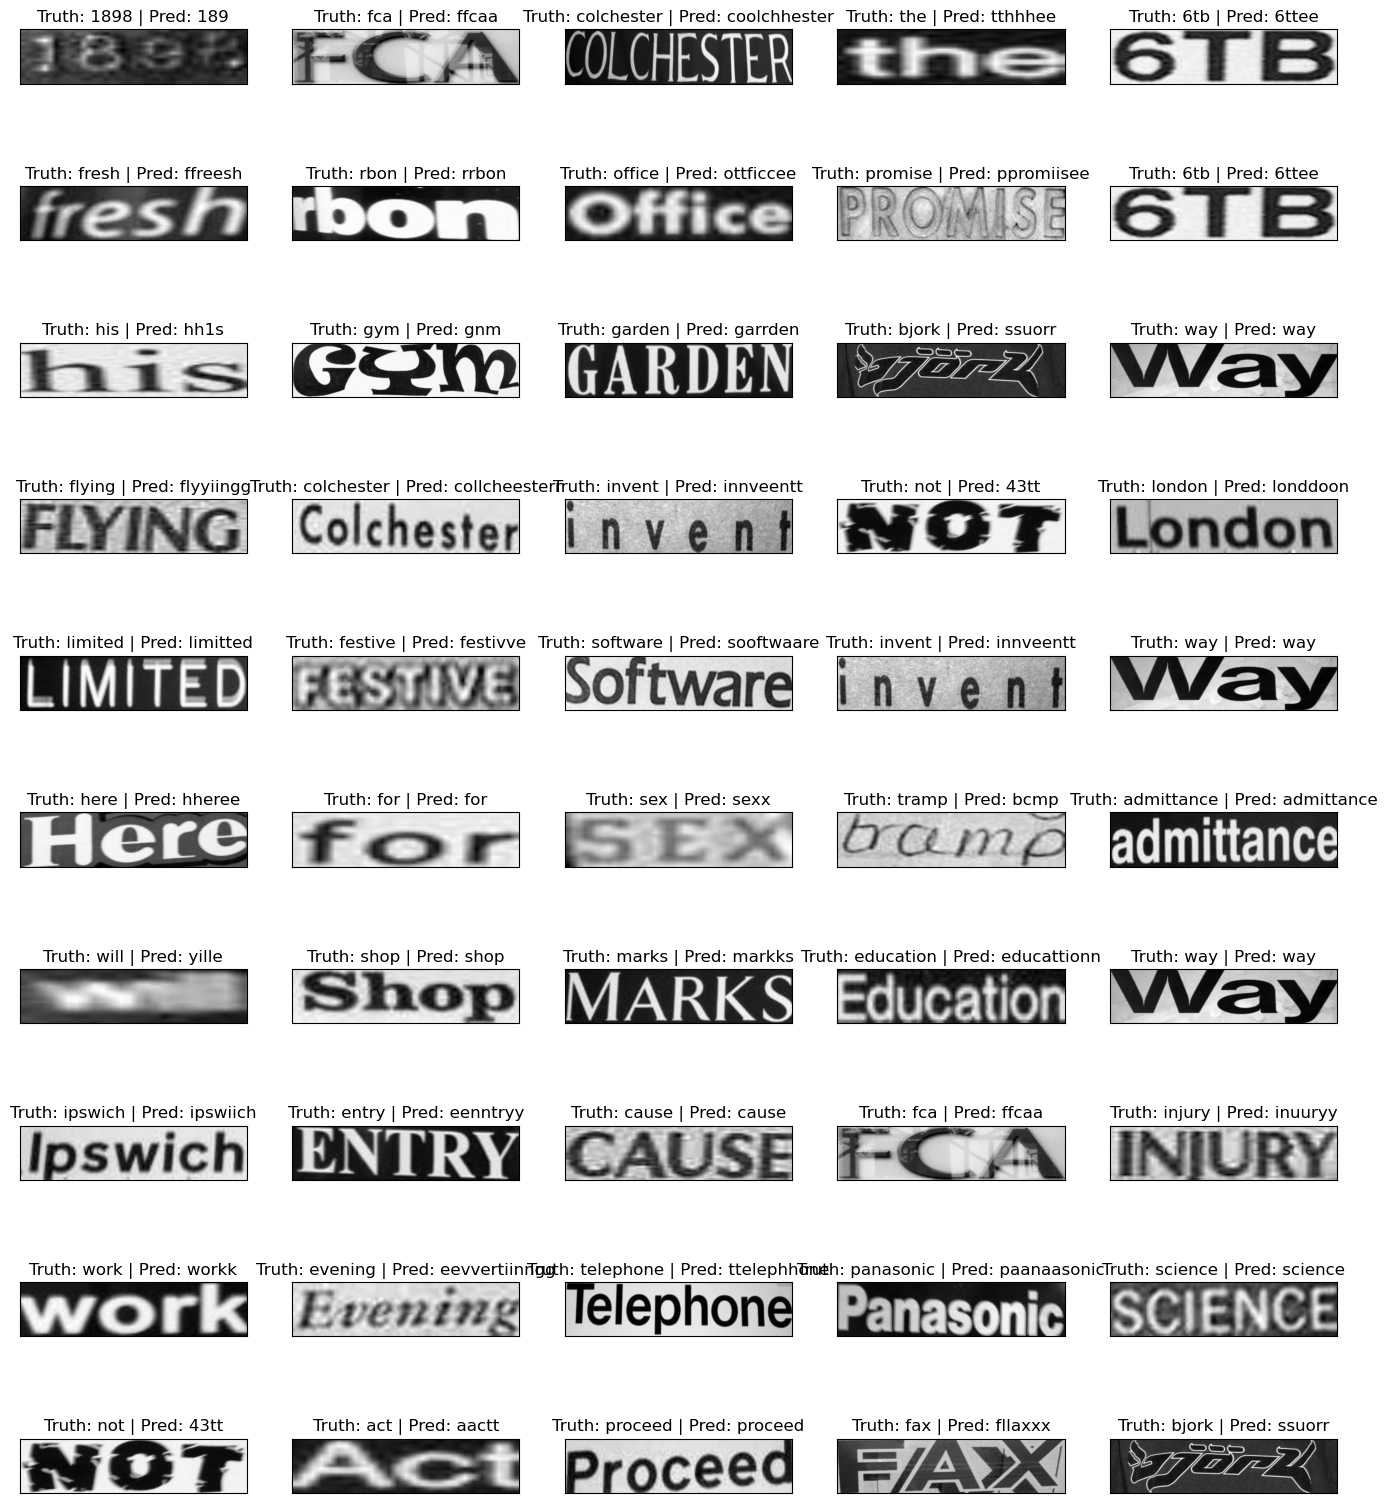

In [172]:
# View samples
sample_result = []

for i in range(50):
    idx = np.random.randint(len(val_dataset))
    img, label, label_len = val_dataset[idx]
    img = img.to(device)
    label = label.to(device)
    label = decode([label])[0]
    logits = model(img.unsqueeze(0))
    
    pred_text = decode(logits.permute(1, 0, 2).argmax(2))[0]
    
    sample_result.append((img, label, pred_text))

fig = plt.figure(figsize=(17, 20))
for i in range(50):
    ax = fig.add_subplot(10, 5, i+1, xticks=[], yticks=[])

    img, label, pred_text = sample_result[i]
    img = img.cpu()
    title = f'Truth: {label} | Pred: {pred_text}'

    ax.imshow(img.permute(1, 2, 0), cmap='gray')
    ax.set_title(title)

plt.show()

## Test dataset

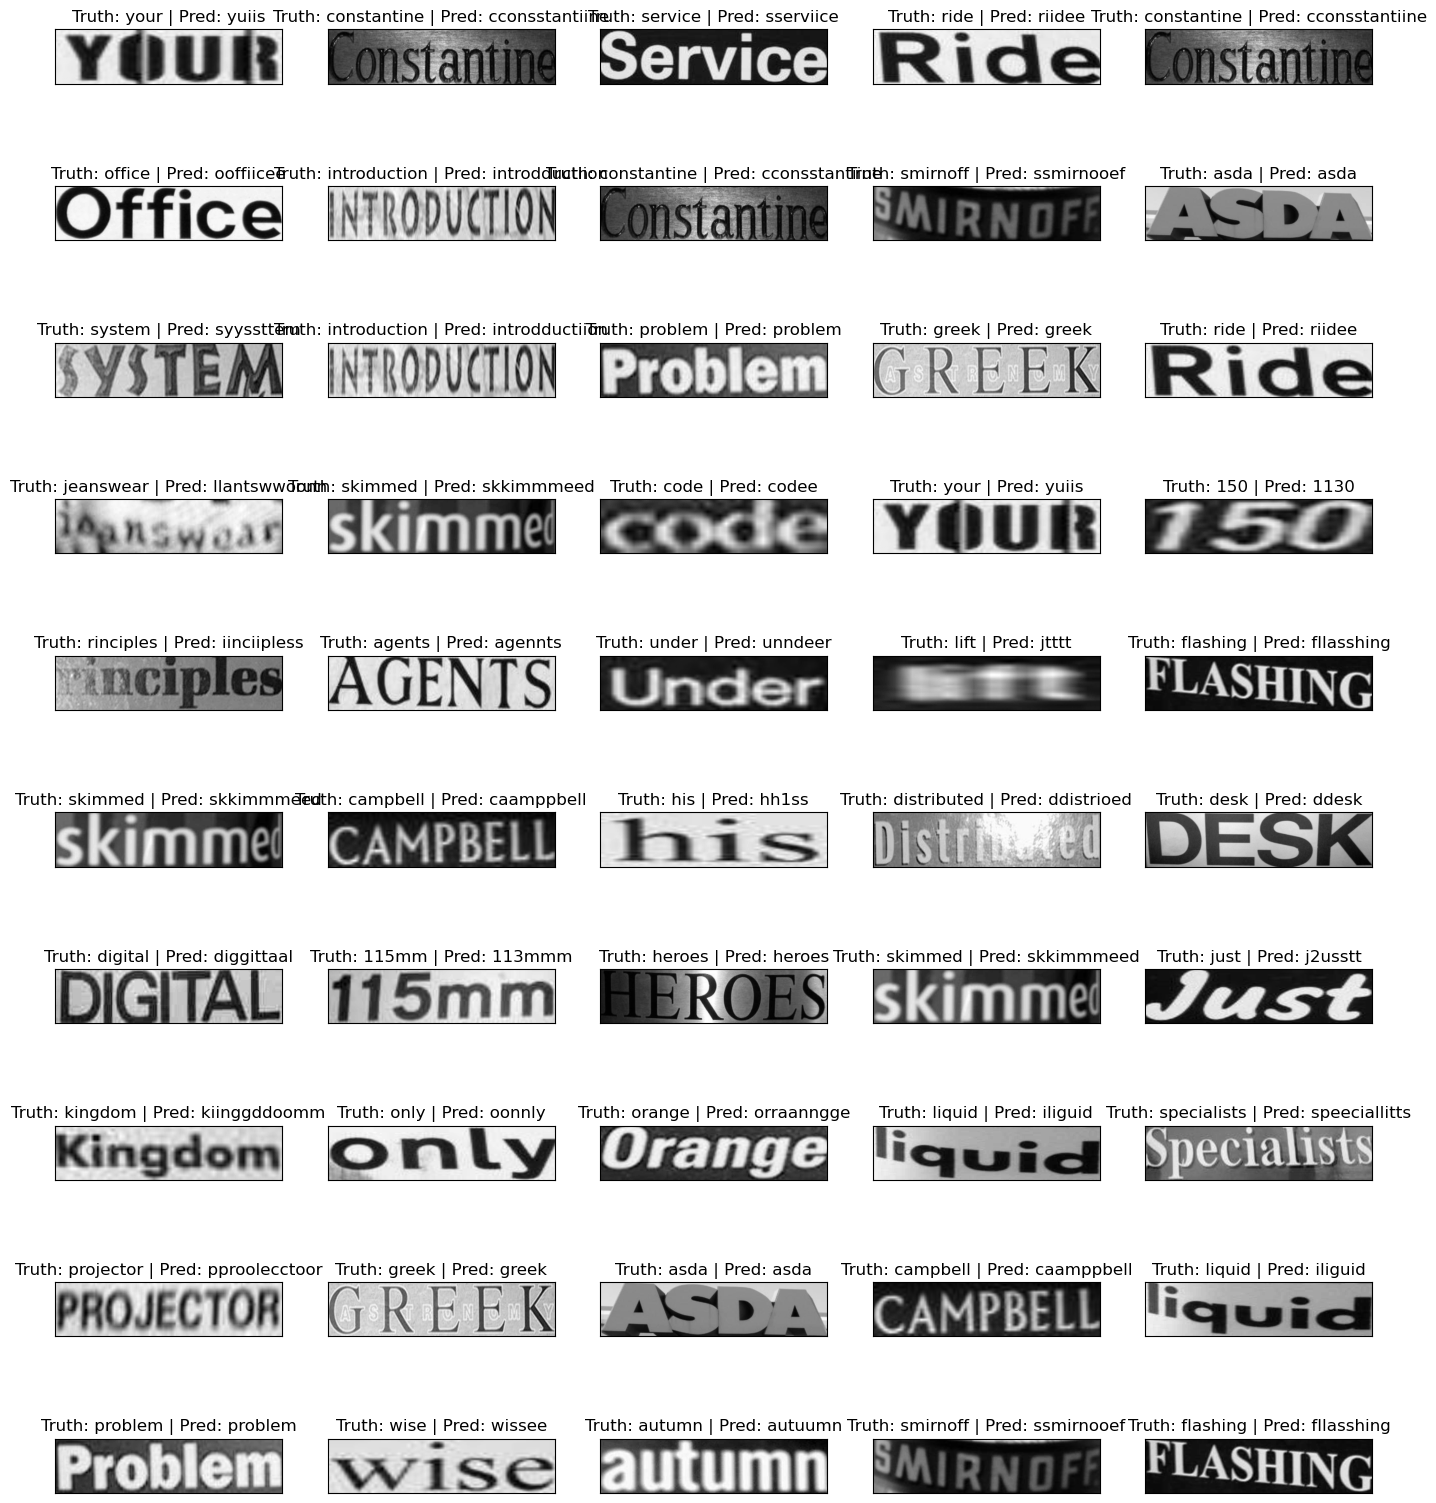

In [173]:
# View samples
sample_result = []

for i in range(50):
    idx = np.random.randint(len(test_dataset))
    img, label, label_len = test_dataset[idx]
    img = img.to(device)
    label = label.to(device)
    label = decode([label])[0]
    logits = model(img.unsqueeze(0))
    
    pred_text = decode(logits.permute(1, 0, 2).argmax(2))[0]
    
    sample_result.append((img, label, pred_text))

fig = plt.figure(figsize=(17, 20))
for i in range(50):
    ax = fig.add_subplot(10, 5, i+1, xticks=[], yticks=[])

    img, label, pred_text = sample_result[i]
    img = img.cpu()
    title = f'Truth: {label} | Pred: {pred_text}'

    ax.imshow(img.permute(1, 2, 0), cmap='gray')
    ax.set_title(title)

plt.show()

# 13. Save model

In [166]:
pwd

'C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)'

In [175]:
save_model_path = "C:\\Users\\Admin\\AIO\\OCR_STR(Yolov8+CNN)\\models\\ocr_crnn_resnet_best.pt"
torch.save(
    model.state_dict(),
    save_model_path
)